### SORU 2 - TIME SERİES 

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [27]:
df = pd.read_excel("C:\\Users\\zinci\\Downloads\\hackathon 2024 - Yapay Zeka.xlsx")
df.head()


,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700
1,2024-03-05 18:20:00,10.0.901.xx Server 1,19703.467,525.575
2,2024-03-05 18:15:00,10.0.901.xx Server 1,26349.663,631.144
3,2024-03-05 18:10:00,10.0.901.xx Server 1,26068.494,623.673
4,2024-03-05 18:05:00,10.0.901.xx Server 1,25814.357,620.701


In [29]:
df[['DOWNLOAD', 'UPLOAD']] = df[['DOWNLOAD', 'UPLOAD']].fillna(df[['DOWNLOAD', 'UPLOAD']].median())
df.isnull().sum()

TIME_STAMP     0
SERVER_NAME    0
DOWNLOAD       0
UPLOAD         0
dtype: int64

In [30]:
# Hafta içi/hafta sonu bilgisi ekleyelim
df['WEEKDAY'] = df['TIME_STAMP'].dt.dayofweek
df['IS_WEEKEND'] = np.where(df['WEEKDAY'] >= 5, 1, 0)

# Saat bilgisini ekleyelim
df['HOUR'] = df['TIME_STAMP'].dt.hour

# Saat ve dakika bilgilerini ekleyelim
df['HOUR'] = df['TIME_STAMP'].dt.hour
df['MINUTE'] = df['TIME_STAMP'].dt.minute

In [31]:
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])
df.set_index('TIME_STAMP', inplace=True)

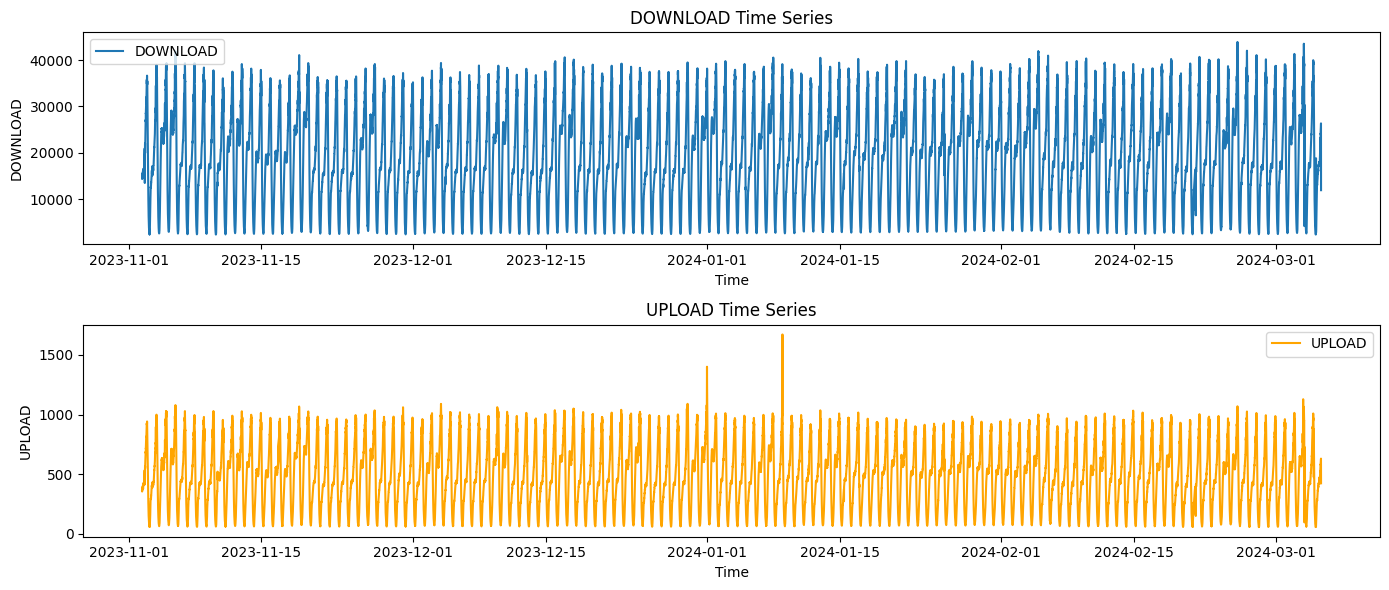

In [32]:
# Plot DOWNLOAD and UPLOAD time series
plt.figure(figsize=(14, 6))

# Plot DOWNLOAD
plt.subplot(2, 1, 1)
plt.plot(df.index, df['DOWNLOAD'], label='DOWNLOAD')
plt.title('DOWNLOAD Time Series')
plt.xlabel('Time')
plt.ylabel('DOWNLOAD')
plt.legend()

# Plot UPLOAD
plt.subplot(2, 1, 2)
plt.plot(df.index, df['UPLOAD'], label='UPLOAD', color='orange')
plt.title('UPLOAD Time Series')
plt.xlabel('Time')
plt.ylabel('UPLOAD')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
df.sort_index(ascending=False, inplace=True)
df.head()

,SERVER_NAME,DOWNLOAD,UPLOAD,WEEKDAY,IS_WEEKEND,HOUR,MINUTE
TIME_STAMP,,,,,,,
2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700,1,0,18,25
2024-03-05 18:20:00,10.0.901.xx Server 1,19703.467,525.575,1,0,18,20
2024-03-05 18:15:00,10.0.901.xx Server 1,26349.663,631.144,1,0,18,15
2024-03-05 18:10:00,10.0.901.xx Server 1,26068.494,623.673,1,0,18,10
2024-03-05 18:05:00,10.0.901.xx Server 1,25814.357,620.701,1,0,18,5


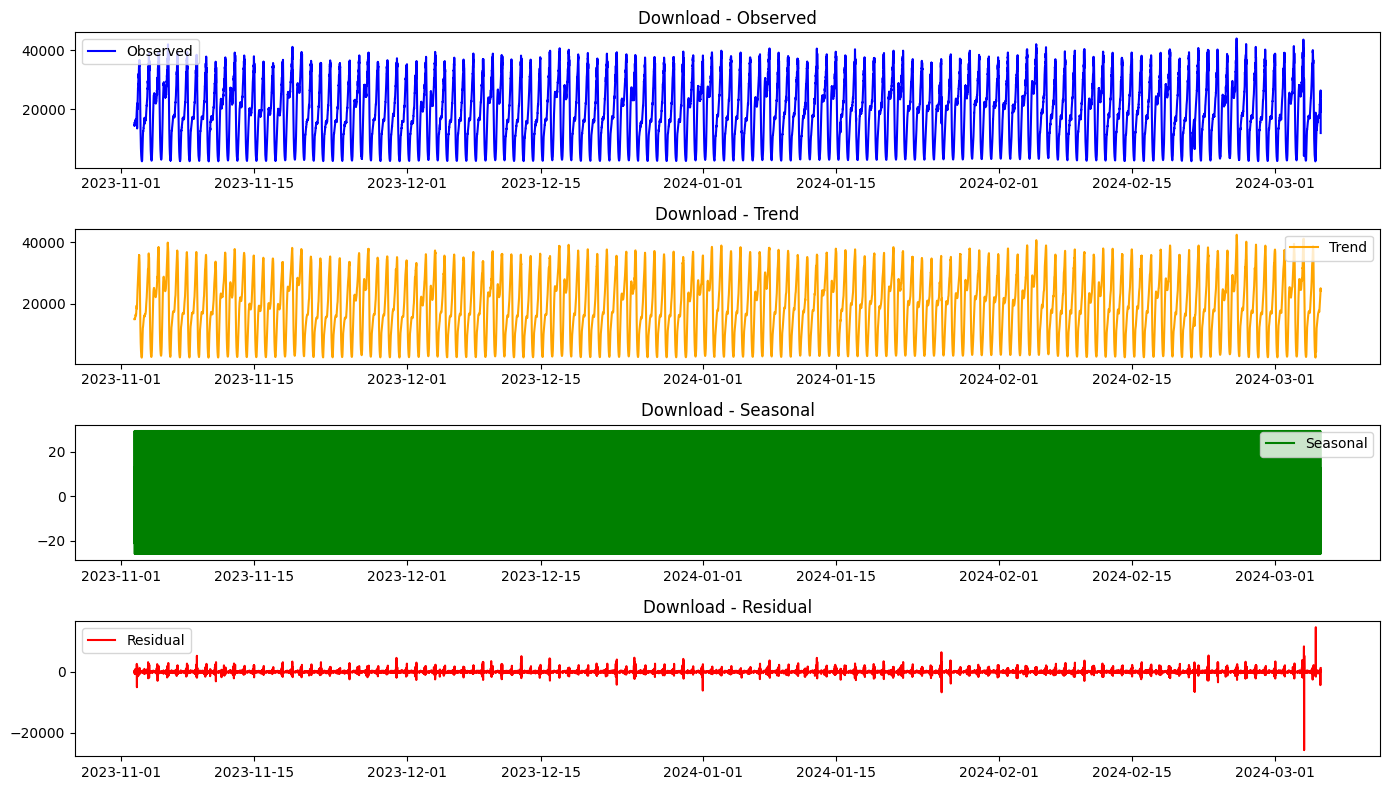

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for DOWNLOAD
decomposition_download = seasonal_decompose(df['DOWNLOAD'], model='additive', period=12)
decomposition_upload = seasonal_decompose(df['UPLOAD'], model='additive', period=12)

# Plot the decomposed components for DOWNLOAD
plt.figure(figsize=(14, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition_download.observed, label='Observed', color='blue')
plt.title('Download - Observed')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition_download.trend, label='Trend', color='orange')
plt.title('Download - Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition_download.seasonal, label='Seasonal', color='green')
plt.title('Download - Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition_download.resid, label='Residual', color='red')
plt.title('Download - Residual')
plt.legend()

plt.tight_layout()
plt.show()


c:\Users\zinci\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zinci\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zinci\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zinci\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

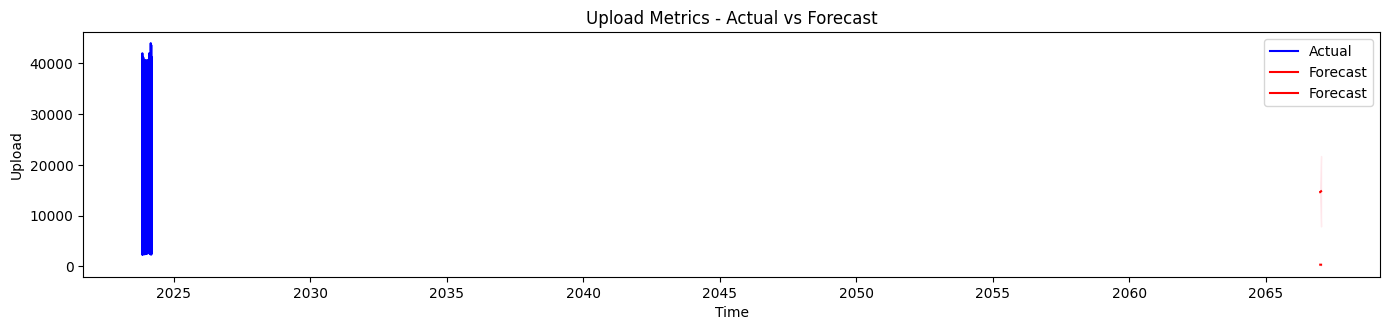

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model - DOWNLOAD
arima_download = ARIMA(df['DOWNLOAD'], order=(5, 1, 0))
arima_download_fit = arima_download.fit()

# Forecast future values for DOWNLOAD
forecast_download = arima_download_fit.get_forecast(steps=12)
forecast_download_mean = forecast_download.predicted_mean
forecast_download_ci = forecast_download.conf_int()

# Fit ARIMA model - UPLOAD
arima_upload = ARIMA(df['UPLOAD'], order=(5, 1, 0))
arima_upload_fit = arima_upload.fit()

# Forecast future values for UPLOAD
forecast_upload = arima_upload_fit.get_forecast(steps=12)
forecast_upload_mean = forecast_upload.predicted_mean
forecast_upload_ci = forecast_upload.conf_int()

plt.figure(figsize=(14, 6))

# DOWNLOAD
plt.subplot(2, 1, 1)
plt.plot(df.index, df['DOWNLOAD'], label='Actual', color='blue')
plt.plot(forecast_download_mean.index, forecast_download_mean, label='Forecast', color='red')
plt.fill_between(forecast_download_ci.index, forecast_download_ci.iloc[:, 0], forecast_download_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Download Metrics - Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('Download')
plt.legend()

# UPLOAD
plt.plot(forecast_upload_mean.index, forecast_upload_mean, label='Forecast', color='red')
plt.fill_between(forecast_upload_ci.index, forecast_upload_ci.iloc[:, 0], forecast_upload_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Upload Metrics - Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('Upload')
plt.legend()

plt.tight_layout()
plt.show()


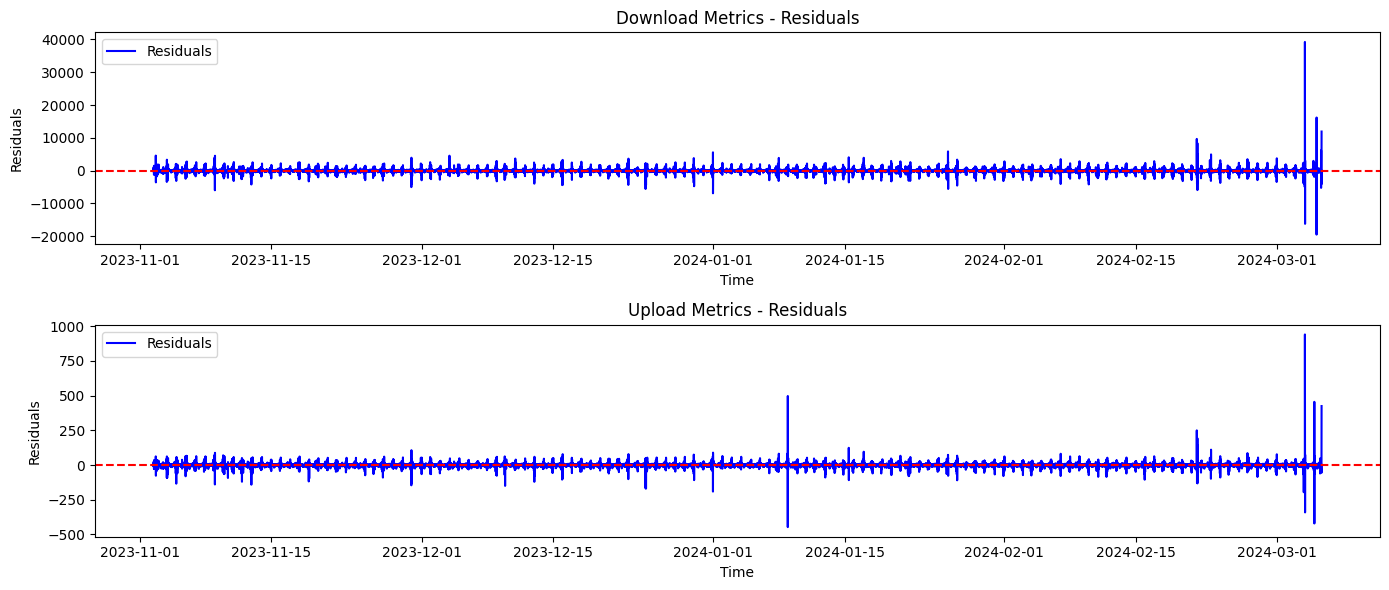

Anomalies in Download Metrics:
TIME_STAMP
2024-03-05 18:25:00    11927.017000
2024-03-05 18:20:00     6702.888562
2024-03-05 18:15:00     3431.668746
2024-03-05 18:10:00    -4124.282413
2024-03-05 18:05:00    -2879.316981
                           ...     
2023-11-02 17:40:00     1734.123610
2023-11-02 17:05:00    -3568.911403
2023-11-02 16:55:00     2483.632754
2023-11-02 16:50:00     1840.784901
2023-11-02 16:45:00     4591.657032
Length: 560, dtype: float64
Anomalies in Upload Metrics:
TIME_STAMP
2024-03-05 18:25:00    424.700000
2024-03-05 18:20:00    100.843336
2024-03-05 18:15:00     71.401000
2024-03-05 18:10:00    -56.183065
2024-03-05 14:35:00     47.554299
                          ...    
2023-11-03 20:50:00     47.982091
2023-11-03 20:45:00    -61.426867
2023-11-02 17:05:00    -76.898308
2023-11-02 16:55:00     43.545455
2023-11-02 16:45:00     62.224923
Length: 436, dtype: float64


In [38]:
import numpy as np

# Residuals hesaplama
residuals_download = df['DOWNLOAD'] - arima_download_fit.fittedvalues
residuals_upload = df['UPLOAD'] - arima_upload_fit.fittedvalues

# Residuals grafikleri oluşturma
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(residuals_download, label='Residuals', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Download Metrics - Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(residuals_upload, label='Residuals', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Upload Metrics - Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

# threshold tanımlama
threshold_download = np.mean(residuals_download) + 3 * np.std(residuals_download)
threshold_upload = np.mean(residuals_upload) + 3 * np.std(residuals_upload)

# anomalies
anomalies_download = residuals_download[np.abs(residuals_download) > threshold_download]
anomalies_upload = residuals_upload[np.abs(residuals_upload) > threshold_upload]

print("Anomalies in Download Metrics:")
print(anomalies_download)

print("Anomalies in Upload Metrics:")
print(anomalies_upload)

In [40]:
print("Tahmin Edilen İndirme Değerleri:")
print(arima_download_fit.fittedvalues)

Tahmin Edilen İndirme Değerleri:
TIME_STAMP
2024-03-05 18:25:00        0.000000
2024-03-05 18:20:00    13000.578438
2024-03-05 18:15:00    22917.994254
2024-03-05 18:10:00    30192.776413
2024-03-05 18:05:00    28693.673981
                           ...     
2023-11-02 10:30:00    14674.568329
2023-11-02 10:25:00    14489.561259
2023-11-02 10:20:00    14342.799987
2023-11-02 10:15:00    14284.486950
2023-11-02 10:10:00    14265.988748
Length: 35429, dtype: float64


In [41]:
print("Tahmin Edilen Upload Değerleri:")
print(arima_upload_fit.fittedvalues)

Tahmin Edilen Upload Değerleri:
TIME_STAMP
2024-03-05 18:25:00      0.000000
2024-03-05 18:20:00    424.731664
2024-03-05 18:15:00    559.743000
2024-03-05 18:10:00    679.856065
2024-03-05 18:05:00    657.539047
                          ...    
2023-11-02 10:30:00    365.247262
2023-11-02 10:25:00    361.420270
2023-11-02 10:20:00    355.536003
2023-11-02 10:15:00    355.179063
2023-11-02 10:10:00    353.759608
Length: 35429, dtype: float64


In [ ]:
# istenen tarih: 2024-03-05 18:25:00
# Anamoly is True